In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json
import glob
from collections import defaultdict
from scipy import stats, signal


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
billboard_data = pd.read_csv("/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/BIllboard_Data/billboard_mft_test.csv")

In [23]:
with open('/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/BIllboard_Data/Billboard-MFT-updated.json', 'r') as mft_file:
  billboard_mft_updated = json.load(mft_file)

In [24]:
mft_updated = pd.DataFrame(billboard_mft_updated)
mft_updated

,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation
0,0,0.846338,0.053448,0.195516,0.037710,0.475043,0.177541,0.141910,0.084180,0.135630,0.093008
1,1,0.484724,0.126767,0.219189,0.046852,0.614545,0.174688,0.154236,0.154855,0.063480,0.106577
2,2,0.241348,0.710004,0.333295,0.756879,0.229500,0.320120,0.139402,0.291146,0.068216,0.331391
3,3,0.672575,0.327728,0.189658,0.038055,0.619407,0.220273,0.200768,0.110029,0.071265,0.102929
4,4,0.554874,0.166988,0.175651,0.080778,0.415172,0.697619,0.183421,0.340915,0.125353,0.122449
...,...,...,...,...,...,...,...,...,...,...,...
5553,5553,0.739125,0.850915,0.237071,0.121445,0.550218,0.183162,0.188647,0.268685,0.056533,0.482325
5554,5554,0.169991,0.637093,0.403685,0.254101,0.256718,0.097872,0.210059,0.275140,0.088297,0.135671
5555,5555,0.097940,0.478967,0.276692,0.742564,0.316703,0.201264,0.217716,0.434340,0.054972,0.131120
5556,5556,0.356081,0.854528,0.202846,0.635366,0.424587,0.227600,0.385876,0.497536,0.104921,0.564897


In [25]:
# see all columns
pd.set_option('display.max_columns', None)

In [26]:
billboard_data = billboard_data[['Year', 'Position', 'Song Title', 'Artist', 'Artist Type',
       'Artist Gender', 'Genres', 'lyrics', 'detected_language',
       'mapped_genres', 'cleaned_lyrics', 'id']]

In [27]:
billboard_data = pd.concat([billboard_data, mft_updated], axis=1)

In [28]:
billboard_data

,Year,Position,Song Title,Artist,Artist Type,Artist Gender,Genres,lyrics,detected_language,mapped_genres,cleaned_lyrics,id,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation
0,1960,1,Theme from A Summer Place,Percy Faith,Person,Male,"['easy listening', ""man's orchestra""]",There's a summer place\nWhere it may rain or s...,en,Classical,There's a summer place Where it may rain or st...,0,0,0.846338,0.053448,0.195516,0.037710,0.475043,0.177541,0.141910,0.084180,0.135630,0.093008
1,1960,2,He'll Have to Go,Jim Reeves,Person,Male,['country'],Put your sweet lips a little closer to the pho...,en,Country,Put your sweet lips a little closer to the pho...,1,1,0.484724,0.126767,0.219189,0.046852,0.614545,0.174688,0.154236,0.154855,0.063480,0.106577
2,1960,3,Cathy's Clown,The Everly Brothers,Group,Male,"['rockabilly', 'rock & roll']",Don't want your love anymore\nDon't want your ...,en,Rock,Don't want your love anymore Don't want your k...,2,2,0.241348,0.710004,0.333295,0.756879,0.229500,0.320120,0.139402,0.291146,0.068216,0.331391
3,1960,4,Running Bear,Johnny Preston,Person,Male,['traditional pop music'],On the bank of the river\nStood Running Bear y...,en,Pop,On the bank of the river Stood Running Bear yo...,3,3,0.672575,0.327728,0.189658,0.038055,0.619407,0.220273,0.200768,0.110029,0.071265,0.102929
4,1960,5,Teen Angel,Mark Dinning,Person,Male,['deep adult standards'],Teen Angel\nTeen Angel\nTeen Angel\n\n\nThat f...,en,Deep adult standards,Teen Angel Teen Angel Teen Angel That fatefu...,4,4,0.554874,0.166988,0.175651,0.080778,0.415172,0.697619,0.183421,0.340915,0.125353,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,2023,93,Wild as Her,Corey Kent,Person,Male,"['modern country pop', 'texas country']",She never wanted to be whitepicket fenced in\n...,en,"Pop,Country",She never wanted to be whitepicket fenced in H...,5553,5553,0.739125,0.850915,0.237071,0.121445,0.550218,0.183162,0.188647,0.268685,0.056533,0.482325
5554,2023,95,I Wrote the Book,Morgan Wallen,Person,Male,['contemporary country'],When it comes to hitchin' the boat up\nBackin'...,en,Country,When it comes to hitchin' the boat up Backin' ...,5554,5554,0.169991,0.637093,0.403685,0.254101,0.256718,0.097872,0.210059,0.275140,0.088297,0.135671
5555,2023,98,Put It on da Floor Again,Latto feat. Cardi B,Collab,Female,"['alternative pop', 'awful', 'hip hop']",Go Grizz\nAh \nWhat's happenin'? \nBig Latto \...,en,"Rap/Hip Hop,Pop",Go Grizz Ah What's happenin'? Big Latto R...,5555,5555,0.097940,0.478967,0.276692,0.742564,0.316703,0.201264,0.217716,0.434340,0.054972,0.131120
5556,2023,99,Bloody Mary,Lady Gaga,Person,Female,"['dance', 'synth-pop', 'disco', 'pop', 'pop ro...",Money\n\n\nLove is just a history that they ma...,en,"Punk,Pop,Soul/Funk,Electronica/dance,Rock",Money Love is just a history that they may p...,5556,5556,0.356081,0.854528,0.202846,0.635366,0.424587,0.227600,0.385876,0.497536,0.104921,0.564897


In [29]:
billboard_data.Genres

,Genres
0,"['easy listening', ""man's orchestra""]"
1,['country']
2,"['rockabilly', 'rock & roll']"
3,['traditional pop music']
4,['deep adult standards']
...,...
5553,"['modern country pop', 'texas country']"
5554,['contemporary country']
5555,"['alternative pop', 'awful', 'hip hop']"
5556,"['dance', 'synth-pop', 'disco', 'pop', 'pop ro..."


In [30]:
import re

# Keywords for mapping genres to broader categories based on musicmap: https://musicmap.info
keywords_by_genre = {
    'Rock': ['rock', 'aor', 'grunge', 'alternative rock'],

    'Punk': ['punk', 'emo', 'screamo', 'no wave', 'new wave',
             'ska', '2-tone', '2 tone', 'synthpop', 'crustcore',
             'd beat', 'd-beat', 'discore'],

    'Metal': ['metal', 'heavy metal', 'grindcore', 'nwobhm'],

    'Pop': ['pop', 'chillwave', 'indietronica', 'schlager',
            'bubblegum', 'singer-songwriter', 'singer/songwriter',
            'shoegaze', 'britpop', 'futurepop', 'indie'],
    'Latin': ['latin', 'cumbia', 'salsa', 'merengue', 'bachata', 'tango', 'brazilian', 'mexican', 'samba', 'mpb', 'bossa nova'],
    'Rap/Hip Hop': ['rap', 'hip-hop', 'hip hop', 'trap', 'gangsta'],
    'R&b and Soul/Funk': ['funk', 'soul', 'disco', 'rnb', 'r&b', 'reggae'],
    'Jazz and Blues': ['jazz', 'bop', 'swing', 'dixieland', 'blues', 'boogie'],
    'Classical': ['classical', 'classic', 'opera', 'symphony', 'soprano',
                  'tenor', 'contralto', 'baritone', 'violinist', 'pianist', 'conductor', 'orchestra'],

    'Country and Folk': ['folk', 'neofolk', 'country'],
    'Religious': ['christian', 'gospel'],
    'Experimental': ['experimental'],
    'Electronic': ['electronica', 'electronic', 'edm', 'electronic dance', 'dance and electronica', 'techno', 'house', 'eurodance',
                          'nu disco', 'funktronica', 'complextro', 'moombahton', 'drum and bass', 'breakcore', 'ambient', 'electropop', 'trance']
}

In [31]:
# Function to map genres to broader categories
def map_genres(genres_list):
    matched_categories = set()

    # Handle cases where genres_list might be NaN or empty
    if not isinstance(genres_list, str) or not genres_list:
        return "Other"

    genres_list = genres_list.split(",")
    # Take only the first two genres
    genres_list = genres_list[:2]

    # Loop through each category and its keywords
    for category, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check if any keyword matches any genre in the list
            for genre in genres_list:
                if re.search(rf'\b{keyword}\b', genre.strip(), re.IGNORECASE):
                    matched_categories.add(category)
                    break  # Exit the inner loop once a match is found

    # Return joined categories or 'Other' if no matches
    return ','.join(matched_categories) if matched_categories else 'Other'

# Apply the function
billboard_data['mapped_genres'] = billboard_data['Genres'].apply(map_genres)

In [32]:
billboard_data.head(3)

,Year,Position,Song Title,Artist,Artist Type,Artist Gender,Genres,lyrics,detected_language,mapped_genres,cleaned_lyrics,id,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation
0,1960,1,Theme from A Summer Place,Percy Faith,Person,Male,"['easy listening', ""man's orchestra""]",There's a summer place\nWhere it may rain or s...,en,Classical,There's a summer place Where it may rain or st...,0,0,0.846338,0.053448,0.195516,0.037710,0.475043,0.177541,0.141910,0.084180,0.135630,0.093008
1,1960,2,He'll Have to Go,Jim Reeves,Person,Male,['country'],Put your sweet lips a little closer to the pho...,en,Country and Folk,Put your sweet lips a little closer to the pho...,1,1,0.484724,0.126767,0.219189,0.046852,0.614545,0.174688,0.154236,0.154855,0.063480,0.106577
2,1960,3,Cathy's Clown,The Everly Brothers,Group,Male,"['rockabilly', 'rock & roll']",Don't want your love anymore\nDon't want your ...,en,Rock,Don't want your love anymore Don't want your k...,2,2,0.241348,0.710004,0.333295,0.756879,0.229500,0.320120,0.139402,0.291146,0.068216,0.331391


In [33]:
dummy_genres = billboard_data['mapped_genres'].str.get_dummies(sep=',')
billboard_data = pd.concat([billboard_data, dummy_genres], axis=1)


In [34]:
billboard_data.head(3)

,Year,Position,Song Title,Artist,Artist Type,Artist Gender,Genres,lyrics,detected_language,mapped_genres,cleaned_lyrics,id,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation,Classical,Country and Folk,Electronic,Experimental,Jazz and Blues,Latin,Metal,Other,Pop,Punk,R&b and Soul/Funk,Rap/Hip Hop,Religious,Rock
0,1960,1,Theme from A Summer Place,Percy Faith,Person,Male,"['easy listening', ""man's orchestra""]",There's a summer place\nWhere it may rain or s...,en,Classical,There's a summer place Where it may rain or st...,0,0,0.846338,0.053448,0.195516,0.037710,0.475043,0.177541,0.141910,0.084180,0.135630,0.093008,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960,2,He'll Have to Go,Jim Reeves,Person,Male,['country'],Put your sweet lips a little closer to the pho...,en,Country and Folk,Put your sweet lips a little closer to the pho...,1,1,0.484724,0.126767,0.219189,0.046852,0.614545,0.174688,0.154236,0.154855,0.063480,0.106577,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1960,3,Cathy's Clown,The Everly Brothers,Group,Male,"['rockabilly', 'rock & roll']",Don't want your love anymore\nDon't want your ...,en,Rock,Don't want your love anymore Don't want your k...,2,2,0.241348,0.710004,0.333295,0.756879,0.229500,0.320120,0.139402,0.291146,0.068216,0.331391,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
pd.set_option('display.max_columns', None)

### Billboard MFT and Genre Correlations

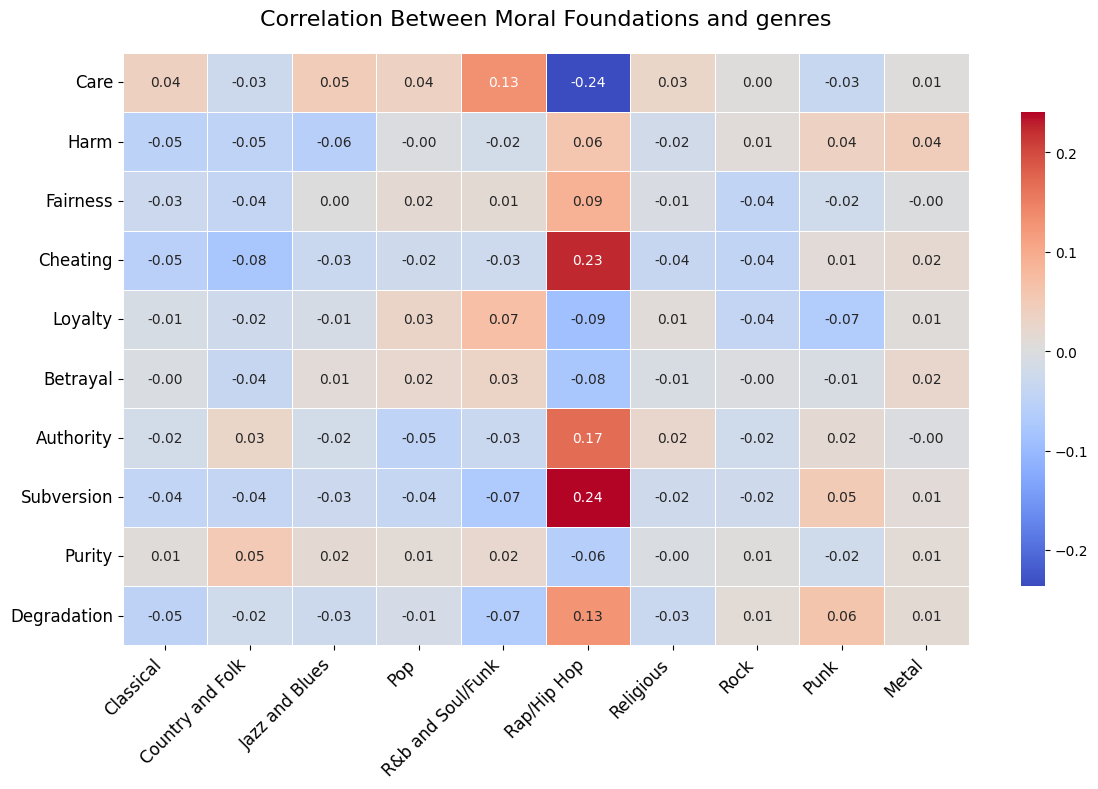

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of moral values
moral_values = ["care", "harm", "fairness", "cheating", "loyalty", "betrayal", "authority", "subversion", "purity", "degradation"]

# Compute correlation between moral foundations and genres
genres = ['Classical', 'Country and Folk','Jazz and Blues', 'Pop',
       'R&b and Soul/Funk', 'Rap/Hip Hop', 'Religious', 'Rock', 'Punk', 'Metal']
genre_mf_correlation = billboard_data[moral_values + genres].corr().loc[moral_values, genres]
genre_mf_correlation.index = genre_mf_correlation.index.str.capitalize()
# Display as a heatmap
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.heatmap(
    genre_mf_correlation,
    annot=True,
    cmap="coolwarm",  # Changed colormap to a more visually appealing one
    fmt=".2f",
    linewidths=0.5,  # Add separation between cells
    linecolor="white",  # Use a lighter grid line color
    annot_kws={"fontsize": 10},  # Adjust annotation font size
    cbar_kws={"shrink": 0.8}  # Adjust colorbar size
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate and adjust alignment
plt.yticks(fontsize=12)  # Adjust y-axis label font size

# Add title with better padding
plt.title("Correlation Between Moral Foundations and genres", fontsize=16, pad=20)

# Ensure proper spacing and display the plot
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/Wasabi_Graphs/Themes_MFT_Corr.pdf', dpi = 300)
plt.show()

In [38]:
billboard_data.columns

Index(['Year', 'Position', 'Song Title', 'Artist', 'Artist Type',
       'Artist Gender', 'Genres', 'lyrics', 'detected_language',
       'mapped_genres', 'cleaned_lyrics', 'id', 'id', 'care', 'harm',
       'fairness', 'cheating', 'loyalty', 'betrayal', 'authority',
       'subversion', 'purity', 'degradation', 'Classical', 'Country and Folk',
       'Electronic', 'Experimental', 'Jazz and Blues', 'Latin', 'Metal',
       'Other', 'Pop', 'Punk', 'R&b and Soul/Funk', 'Rap/Hip Hop', 'Religious',
       'Rock'],
      dtype='object')

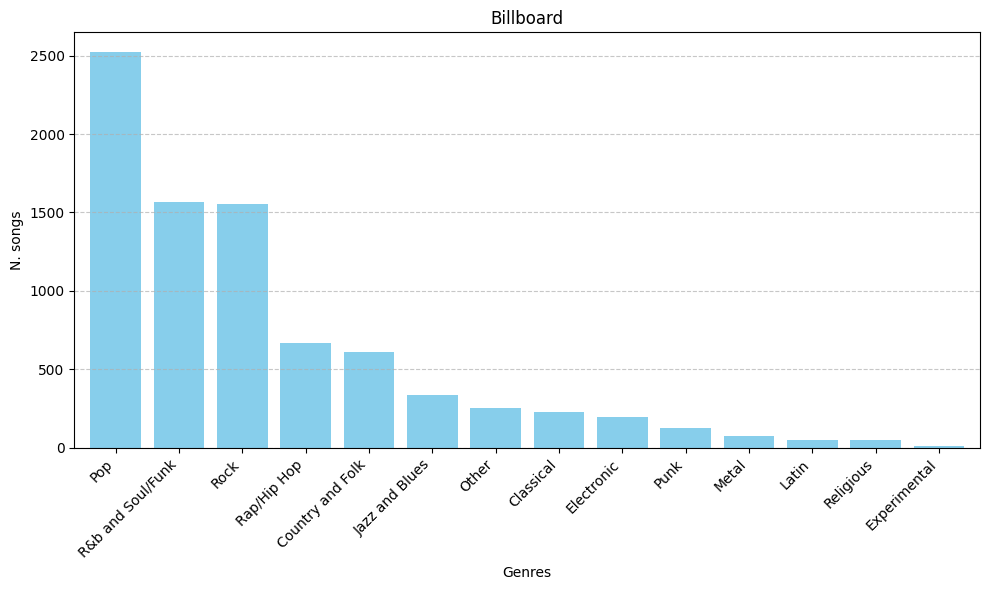

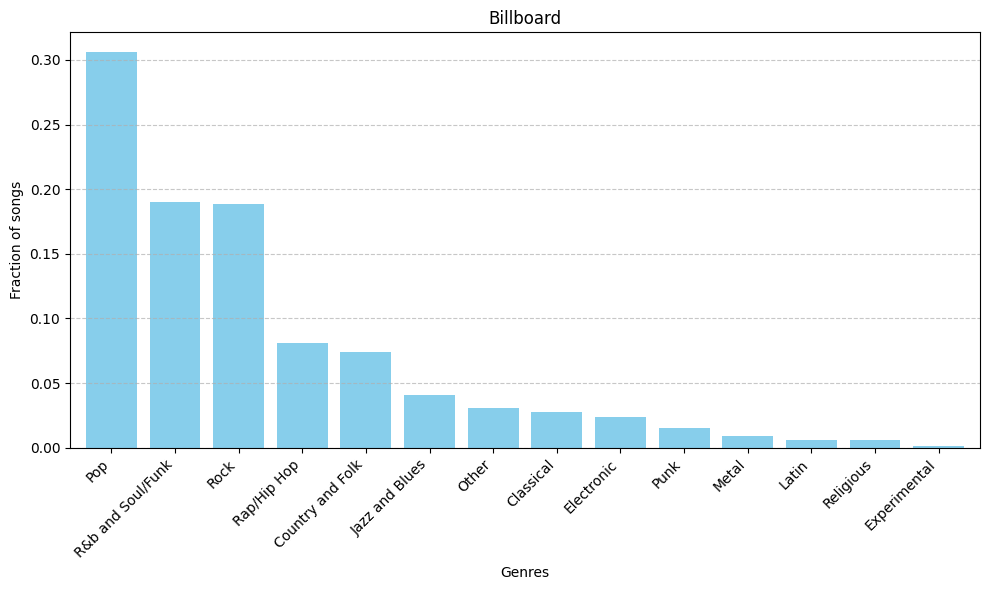

In [39]:
import matplotlib.pyplot as plt

# Assuming 'billboard_data' contains one-hot encoded genre columns
# Sum the columns to count songs for each genre
genre_counts = billboard_data.loc[:,'Classical':'Rock'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', width=0.8)
plt.title('Billboard')
plt.ylabel('N. songs')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Plot fraction of songs
plt.figure(figsize=(10, 6))
(genre_counts / genre_counts.sum()).sort_values(ascending=False).plot(kind='bar', color='skyblue', width=0.8)
plt.title('Billboard')
plt.ylabel('Fraction of songs')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
unique_artists = billboard_data.drop_duplicates('Artist').reset_index()

In [41]:
unique_artists.shape

(2523, 38)

In [42]:
unique_artists['Artist Gender'].value_counts()

,count
Artist Gender,
Male,1685
Female,454
Mix,380
Non-binary,4


In [43]:
unique_artists.groupby(['Artist Gender', 'Artist Type'])['Artist'].count()

Artist Gender  Artist Type
Female         Collab          73
               Group           64
               Person         317
Male           Collab         355
               Group          618
               Person         712
Mix            Collab         226
               Group          154
Non-binary     Person           4
Name: Artist, dtype: int64

In [44]:
 billboard_data.rename(columns = {'Country and Folk': 'Country/Folk', 'Jazz and Blues': 'Jazz/Blues','R&b and Soul/Funk': 'R&b/Soul/Funk'}, inplace = True)

In [45]:
# Aggregate moral foundations by genre
genre_columns = ['Rock', 'Pop','Country/Folk', 'R&b/Soul/Funk', 'Jazz/Blues',
       'Rap/Hip Hop', 'Punk', 'Metal', 'Religious']

# Melt the DataFrame to long format
mf_by_genre = billboard_data.melt(
    id_vars=moral_values,
    value_vars=genre_columns,
    var_name="Genre",
    value_name="Is_Genre"
)

# Filter rows where the genre is present (Is_Genre == 1)
mf_by_genre = mf_by_genre[mf_by_genre["Is_Genre"] == 1]

# Group by Genre/calculate mean for each moral foundation
mf_by_genre_mean = mf_by_genre.groupby("Genre")[moral_values].mean().reset_index()


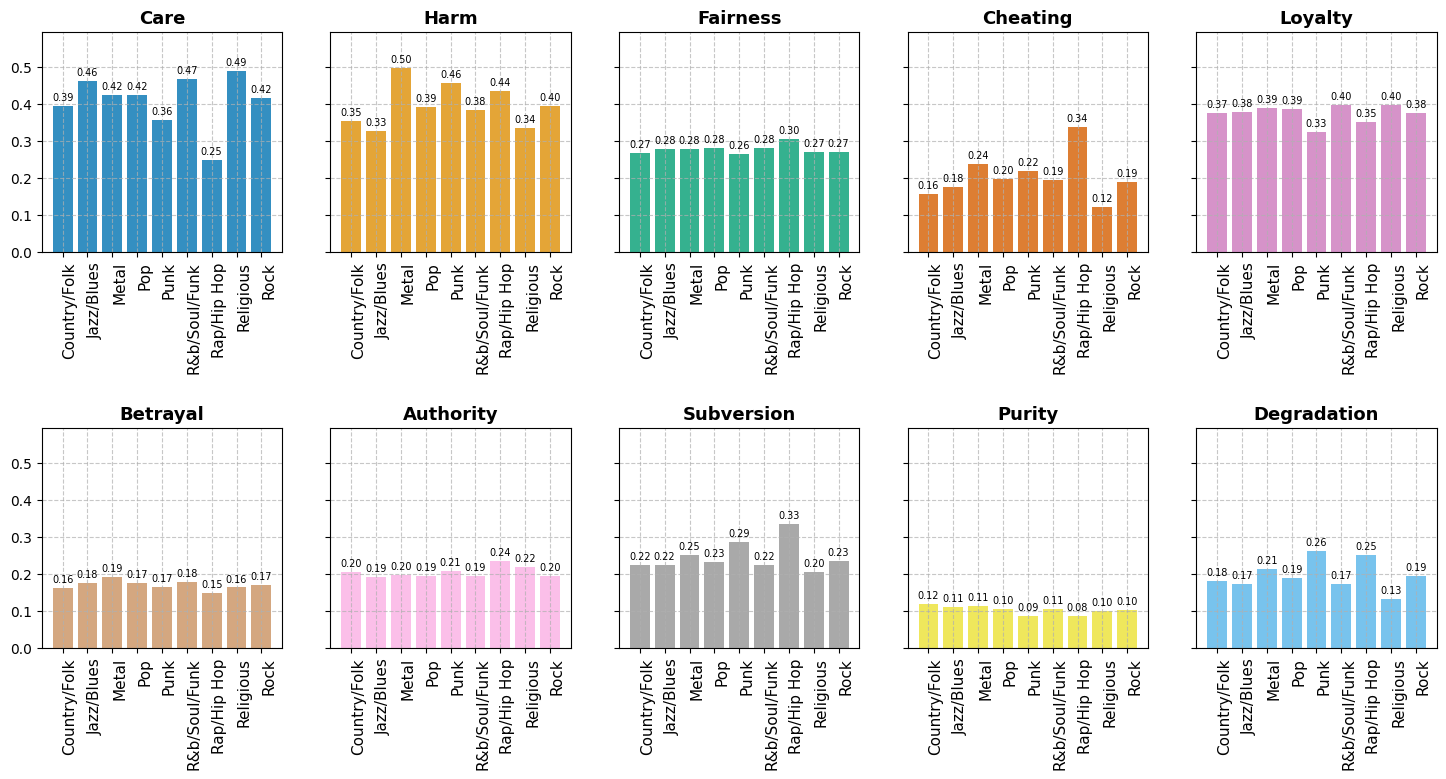

In [46]:
# Reset to default Python font settings
plt.style.use('default')
plt.rcParams.update({'font.family': 'sans-serif'})  # Use standard sans-serif font

# Adjust the figure size for wider layout
fig = plt.figure(figsize=(18, 8))  # Slightly wider width and smaller height
n_cols = 5
n_rows = 2


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.2)

# Use a colorblind-friendly palette
colors = sns.color_palette("colorblind", n_colors=len(moral_values))

# Calculate the global maximum for consistent y-axis limits
global_ymax = max(mf_by_genre_mean[mf].max() for mf in moral_values)

for idx, mf in enumerate(moral_values):
    ax = fig.add_subplot(n_rows, n_cols, idx + 1)

    # Create bar plot without error bars
    bars = ax.bar(
        mf_by_genre_mean["Genre"],
        mf_by_genre_mean[mf],
        color=colors[idx],
        alpha=0.8
    )

    # Customize the plot
    ax.set_title(mf.capitalize(), fontsize=13, fontweight='bold')
    ax.set_xticks(range(len(mf_by_genre_mean["Genre"])))
    ax.set_xticklabels(mf_by_genre_mean["Genre"], rotation=90, ha='left', fontsize=11)  # Rotate and resize labels
    ax.set_ylim(0, global_ymax * 1.2)

    # Show y-axis labels for the first column only
    if idx % n_cols == 0:
        ax.set_ylabel("", fontsize=11, labelpad=5)
    else:
        ax.set_yticklabels([])  # Hide y-tick labels for other columns

    # Add grid for better readability
    ax.grid(linestyle='--', alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height + (global_ymax * 0.02),
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=7
        )

# Save as a high-resolution PDF for publication
plt.savefig('/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/Billboard_Graphs/Overall_Billboard_Genres_MFT_Averages_5_.pdf', dpi=300, bbox_inches='tight')
plt.show()


## **Moral Evolution in Lyrics from Billboard (1960-2023) - Temporal Analysis**

Window size 5 represents approximately 4.9 years


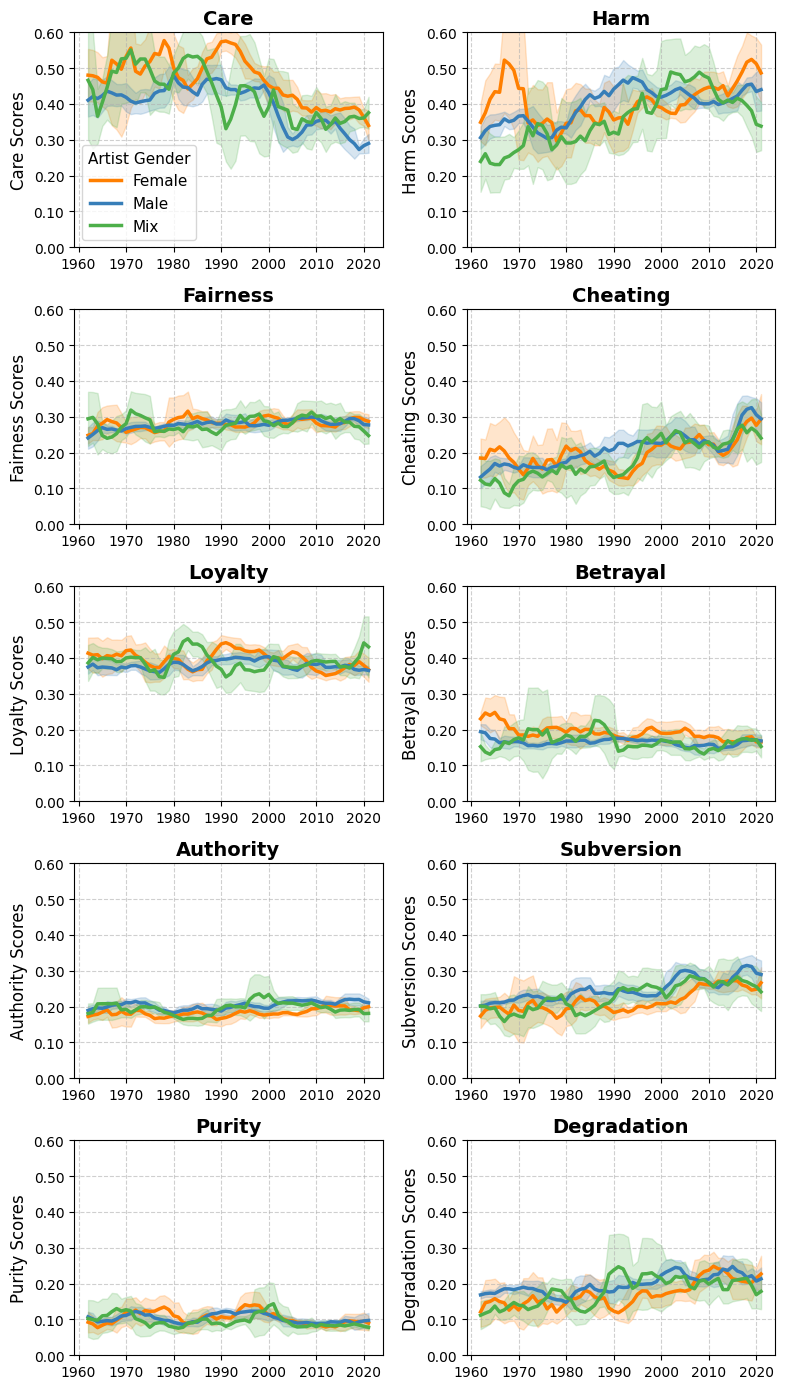

In [ ]:
from matplotlib.ticker import FormatStrFormatter

def plot_trend_with_ci_inline(data, x, y, hue, title, xlabel, ylabel, ci_window=5, custom_palette=None, show_legend=False):
    # Create a rolling mean and confidence interval
    data = data.copy()
    data["mean"] = data.groupby(hue)[y].transform(lambda x: x.rolling(ci_window, center=True).mean())
    data["ci"] = data.groupby(hue)[y].transform(lambda x: x.rolling(ci_window, center=True).std())

    # Plot using seaborn with a custom palette
    sns.lineplot(data=data, x=x, y="mean", hue=hue, ci=None, linewidth=2.5, palette=custom_palette)
    for group in data[hue].unique():
        group_data = data[data[hue] == group]
        plt.fill_between(
            group_data[x],
            group_data["mean"] - group_data["ci"],
            group_data["mean"] + group_data["ci"],
            alpha=0.2,
            color=custom_palette[group]
        )

    # Enhance the plot appearance
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    if show_legend:
        plt.legend(title="Artist Gender", title_fontsize=11, fontsize=11, loc="best")
    else:
        plt.legend().remove()   # Remove legend for other subplots


# Prepare data:
filtered_data = artist_gender_trends[artist_gender_trends["Artist Gender"].isin(["Male", "Female", "Mix"])]

years_span = filtered_data['Year'].nunique()
ci_window = 5 #max(2, int(years_span * 0.05))  # 5% of year range

# Calculate what your window represents
years_covered = filtered_data['Year'].dt.year.max() - filtered_data['Year'].dt.year.min()
unique_years = filtered_data['Year'].dt.year.nunique()
temporal_span = (ci_window / unique_years) * years_covered
print(f"Window size {ci_window} represents approximately {temporal_span:.1f} years")


# Define a custom color palette
gender_palette = {"Male": "#377eb8", "Female": "#ff7f00", "Mix": "#4daf4a"}

# List of moral values to iterate over
moral_values = ["care", "harm", "fairness", "cheating", "loyalty",
                "betrayal", "authority", "subversion", "purity", "degradation"]

# Plot in a grid (2 graphs per row, 5 rows in total)
rows = 5
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(8, 14))
fig.subplots_adjust(wspace=1.0)  # increase horizontal space between subplots

for i, moral_value in enumerate(moral_values):
    row = i // cols
    col = i % cols
    plt.sca(axes[row, col])  # Set current axis
    # Show legend only for "Care" and "Loyalty"
    show_legend = moral_value in ["care"]

    plot_trend_with_ci_inline(
        data=filtered_data,
        x="Year",
        y=moral_value,
        hue="Artist Gender",
        title=f"{moral_value.capitalize()}",
        xlabel="",
        ylabel=f"{moral_value.capitalize()} Scores",
        ci_window=ci_window,
        custom_palette=gender_palette,  # Apply custom colors
        show_legend=show_legend
    )
    # Format y-axis to 2 decimal places
    axes[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.ylim(0, 0.6)  # Set y-axis range

    # Adjust spacing between rows to be tighter and columns
    # plt.subplots_adjust(hspace=0.8)

# Adjust layout and display
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/Billboard_Graphs/Overall_MFT_trends_Billboard_v3.pdf", dpi=300,bbox_inches="tight")
plt.show()


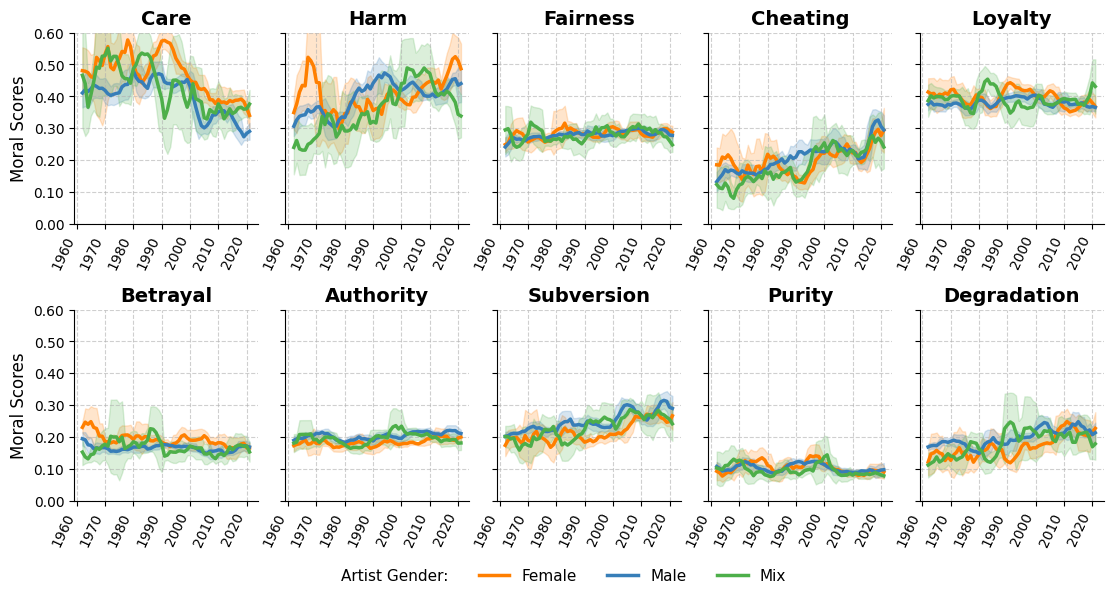

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Import the missing formatter
from matplotlib.ticker import FormatStrFormatter
# Import for the new legend
import matplotlib.patches as mpatches

# Assume 'artist_gender_trends' DataFrame is loaded and available
# Example placeholder for 'artist_gender_trends'
if 'artist_gender_trends' not in locals():
    print("Creating placeholder data for 'artist_gender_trends'...")
    years = np.arange(1960, 2021)
    genders = ["Male", "Female", "Mix"]
    moral_values_list = ["care", "harm", "fairness", "cheating", "loyalty",
                         "betrayal", "authority", "subversion", "purity", "degradation"]
    data = []
    for year in years:
        for gender in genders:
            entry = {"Year": year, "Artist Gender": gender}
            for val in moral_values_list:
                entry[val] = np.random.rand() * 0.3 + 0.1 + (genders.index(gender) * 0.05)
            data.append(entry)
    artist_gender_trends = pd.DataFrame(data)
    print("Placeholder data created.")


def plot_trend_with_ci_inline(data, x, y, hue, title, xlabel, ylabel, ci_window=5, custom_palette=None, show_legend=False):
    """
    Create a professional plot with confidence intervals and custom colors.
    (Function definition is unchanged)
    """
    # Create a rolling mean and confidence interval
    data = data.copy()
    data["mean"] = data.groupby(hue)[y].transform(lambda x: x.rolling(ci_window, center=True).mean())
    data["ci"] = data.groupby(hue)[y].transform(lambda x: x.rolling(ci_window, center=True).std())

    # Plot using seaborn with a custom palette
    sns.lineplot(data=data, x=x, y="mean", hue=hue, ci=None, linewidth=2.5, palette=custom_palette)

    for group in data[hue].unique():
        group_data = data[data[hue] == group]
        plt.fill_between(
            group_data[x],
            group_data["mean"] - group_data["ci"],
            group_data["mean"] + group_data["ci"],
            alpha=0.2,
            color=custom_palette[group]
        )

    # Enhance the plot appearance
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    if show_legend:
        plt.legend(title="Artist Gender", title_fontsize=11, fontsize=11, loc="best")
    else:
        if plt.gca().get_legend():
            plt.gca().get_legend().remove()

# Data Preparation
filtered_data = artist_gender_trends[artist_gender_trends["Artist Gender"].isin(["Male", "Female", "Mix"])]
ci_window = 5
gender_palette = {"Male": "#377eb8", "Female": "#ff7f00", "Mix": "#4daf4a"}
moral_values = ["care", "harm", "fairness", "cheating", "loyalty",
                "betrayal", "authority", "subversion", "purity", "degradation"]

# Plotting Grid
rows = 2
cols = 5

# Adjust figsize
fig, axes = plt.subplots(rows, cols, figsize=(11.7, 6.0), sharey=True)
axes_flat = axes.flatten()

for i, moral_value in enumerate(moral_values):
    ax = axes_flat[i]
    plt.sca(ax)

    is_bottom_row = (i // cols == rows - 1)
    is_first_col = (i % cols == 0)

    plot_trend_with_ci_inline(
        data=filtered_data,
        x="Year",
        y=moral_value,
        hue="Artist Gender",
        title=f"{moral_value.capitalize()}",
        xlabel="" if is_bottom_row else "", # X-label "Year" only on bottom
        ylabel="Moral Scores" if is_first_col else "",
        ci_window=ci_window,
        custom_palette=gender_palette,
        show_legend=False
    )

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.ylim(0, 0.6)

# Rotate x-axis tick labels on ALL plots**
for ax in axes_flat:
    # Set rotation and horizontal alignment for better spacing
    plt.setp(ax.get_xticklabels(), rotation=65, ha='right', fontsize=10)

# Add an inline, shared legend (code unchanged)
handles, labels = axes_flat[0].get_legend_handles_labels()
title_handle = mpatches.Patch(color='none', label='Artist Gender:')
all_handles = [title_handle] + handles
all_labels = ['Artist Gender:'] + labels

fig.legend(all_handles, all_labels,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.02), # Slightly adjusted position
           ncol=4,
           fontsize=11,
           frameon=False)
sns.despine()

# Adjust layout for new figure shape**
plt.subplots_adjust(
    left=0.1,     # Increased left margin
    right=0.98,
    top=0.92,     # Adjusted for new height
    bottom=0.14,  # Adjusted for new height
    hspace=0.45,   # Increased horizontal spacing between rows
    wspace=0.15   # Increased vertical spacing between columns
)
# plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/Billboard_Graphs/Overall_MFT_trends_Billboard_5_2.pdf", dpi=300,bbox_inches="tight")
plt.show()

In [ ]:
print("\n=== BILLBOARD SMALL DATASET ===")
print(f"Total observations: {len(billboard_data)}")
print(f"Year range: {billboard_data['Year'].dt.year.min()} to {billboard_data['Year'].dt.year.max()}")
print(f"Years covered: {billboard_data['Year'].dt.year.max() - billboard_data['Year'].dt.year.min()}")
print(f"Unique years: {billboard_data['Year'].dt.year.nunique()}")
print(f"Average observations per year: {len(billboard_data) / billboard_data['Year'].dt.year.nunique():.0f}")



=== BILLBOARD SMALL DATASET ===
Total observations: 5558
Year range: 1960 to 2023
Years covered: 63
Unique years: 64
Average observations per year: 87


In [ ]:
billboard_mft_features = billboard_data[['Year','Song Title', 'Artist', 'care', 'harm','fairness', 'cheating', 'loyalty', 'betrayal', 'authority',
       'subversion', 'purity', 'degradation']]

# Topic Modelling:

In [ ]:
# !pip install bertopic umap-learn hdbscan scikit-learn pandas matplotlib
!pip install pandas numpy scikit-learn gensim pyLDAvis matplotlib nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim import corpora
from gensim.corpora import Dictionary, MmCorpus
from gensim.utils import simple_preprocess
from gensim.models import LdaModel, CoherenceModel, LdaMulticore
import pyLDAvis
from pyLDAvis import gensim_models as gensimvis
pyLDAvis.enable_notebook()


In [ ]:
import re

# Manually defined English stopwords (since nltk might cause issues in Google Colab)
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",
    "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",
    "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don",
    "should", "now"
])

# Function to clean and tokenize lyrics
def clean_lyrics(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"\[.*?\]", "", text)  # Remove text inside brackets
    text = re.sub(r"\W+", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = text.split()  # Use split instead of word_tokenize to avoid nltk issues
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Apply cleaning function to lyrics
billboard_data["cleaned_lyrics"] = billboard_data["lyrics"].astype(str).apply(clean_lyrics)

# Check the cleaned lyrics
billboard_data[["lyrics", "cleaned_lyrics"]].head()


,lyrics,cleaned_lyrics
0,There's a summer place\nWhere it may rain or s...,"[summer, place, may, rain, storm, yet, m, safe..."
1,Put your sweet lips a little closer to the pho...,"[put, sweet, lips, little, closer, phone, lets..."
2,Don't want your love anymore\nDon't want your ...,"[want, love, anymore, want, kisses, sure, die,..."
3,On the bank of the river\nStood Running Bear y...,"[bank, river, stood, running, bear, young, ind..."
4,Teen Angel\nTeen Angel\nTeen Angel\n\n\nThat f...,"[teen, angel, teen, angel, teen, angel, fatefu..."


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requi

# Fine Tuning LDA:

In [ ]:
import gensim
import pandas as pd
from gensim import corpora

# Load the trained LDA model
lda_model = gensim.models.LdaModel.load("/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/BIllboard_Data/websci24_lda_model.pk")

# Extract the dictionary directly from the trained LDA model
dictionary = lda_model.id2word  # Ensures the same word-to-index mapping


#Ensure 'cleaned_lyrics' column contains lists of words, not strings
billboard_data['cleaned_lyrics'] = billboard_data['cleaned_lyrics'].apply(lambda x: x.split() if isinstance(x, str) else x)

# Remove words not in the original LDA dictionary
billboard_data['cleaned_lyrics'] = billboard_data['cleaned_lyrics'].apply(
    lambda doc: [word for word in doc if word in dictionary.token2id]
)

# Convert lyrics into BoW format using the extracted dictionary
new_corpus = [dictionary.doc2bow(doc) for doc in billboard_data['cleaned_lyrics']]

# Ensure all word indices are within the allowed range
max_dict_index = max(dictionary.token2id.values())  # Max index in dictionary
invalid_indices = [word_id for doc in new_corpus for word_id, _ in doc if word_id > max_dict_index]

if invalid_indices:
    print(f"Found {len(invalid_indices)} invalid indices! They will be ignored.")
    print(f"Highest allowed index: {max_dict_index}")
else:
    print("All word indices are valid.")

# Infer topics using the trained LDA model
topic_distributions = [lda_model.get_document_topics(doc) for doc in new_corpus]

# Add topic distributions to the DataFrame
billboard_data['topic_distribution'] = topic_distributions



All word indices are valid.


In [ ]:
# Display the first few rows of the DataFrame
billboard_data[['cleaned_lyrics', 'topic_distribution']].head()


,cleaned_lyrics,topic_distribution
0,"[summer, place, rain, storm, safe, warm, withi...","[(1, 0.121120974), (2, 0.05605439), (3, 0.0912..."
1,"[Put, sweet, little, phone, pretend, together,...","[(0, 0.09251195), (1, 0.3978126), (2, 0.016476..."
2,"[want, love, anymore, want, sure, die, time, h...","[(1, 0.41202813), (2, 0.034428027), (3, 0.0842..."
3,"[bank, river, young, brave, side, river, lovel...","[(1, 0.21631178), (2, 0.3886453), (3, 0.135504..."
4,"[fateful, night, car, railroad, track, safe, r...","[(1, 0.028957114), (2, 0.10634966), (3, 0.1679..."


In [ ]:
# Define the number of top words per topic & lambda value
num_terms = 20  # Adjust as needed
lambd = 0.6  # Adjust based on tuning

# Initialize dictionary to store relevant words for each topic
all_topics = {}

# Extract topic-word probabilities from LDA model
topic_data = pd.DataFrame([
    (topic_id, word, prob, lda_model.get_term_topics(dictionary.token2id[word], minimum_probability=0))
    for topic_id in range(lda_model.num_topics)
    for word, prob in lda_model.show_topic(topic_id, topn=100)  # Get top 100 words for better sorting
])

# Rename columns
topic_data.columns = ['Topic', 'Term', 'logprob', 'loglift']

# Convert loglift values (gensim returns list of tuples)
topic_data['loglift'] = topic_data['loglift'].apply(lambda x: x[0][1] if x else 0)

# Compute topic relevance using your formula
topic_data['relevance'] = topic_data['loglift'] * (1 - lambd) + topic_data['logprob'] * lambd

# Extract top words for each topic
for topic_id in range(lda_model.num_topics):
    topic_words = topic_data[topic_data['Topic'] == topic_id].sort_values(by='relevance', ascending=False).head(num_terms)
    all_topics[f"Topic {topic_id+1}"] = topic_words['Term'].values  # Store top words

# Convert to DataFrame for easy visualization
topic_relevance_df = pd.DataFrame.from_dict(all_topics, orient='index', columns=[f"Word {i+1}" for i in range(num_terms)])

# Display topic relevance table
topic_relevance_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Topic 1,fuck,shit,make,go,see,bitch,back,nigga,money,hit,let,rock,say,keep,put,come,right,man,big,stop
Topic 2,love,want,let,make,feel,say,need,give,never,tell,go,take,right,think,wanna,way,see,thing,heart,time
Topic 3,blood,man,make,come,die,kill,take,back,dead,see,burn,black,fire,ass,head,death,hand,high,give,land
Topic 4,girl,little,baby,boy,like,man,dance,come,fucking,look,shake,see,make,say,want,pretty,sweet,bit,na,woman
Topic 5,see,life,time,never,make,eye,world,fall,still,look,come,dream,go,say,day,light,find,lose,live,hear
Topic 6,go,come,back,time,say,take,way,day,away,home,good,leave,long,well,see,run,make,right,keep,think


In [ ]:
billboard_data['topic_distribution']

,topic_distribution
0,"[(1, 0.121120974), (2, 0.05605439), (3, 0.0912..."
1,"[(0, 0.09251195), (1, 0.3978126), (2, 0.016476..."
2,"[(1, 0.41202813), (2, 0.034428027), (3, 0.0842..."
3,"[(1, 0.21631178), (2, 0.3886453), (3, 0.135504..."
4,"[(1, 0.028957114), (2, 0.10634966), (3, 0.1679..."
...,...
5553,"[(0, 0.23797269), (1, 0.09817402), (2, 0.08317..."
5554,"[(0, 0.2909341), (1, 0.14035164), (2, 0.234705..."
5555,"[(0, 0.6331339), (1, 0.099304765), (2, 0.10196..."
5556,"[(0, 0.14913501), (1, 0.015210909), (2, 0.2267..."


In [ ]:
# Define topic labels
topic_labels = {
    0: 'Profanity and Aggression',
    1: 'Love and Emotions',
    2: 'Violence and Darkness',
    3: 'Passion and Desire',
    4: 'Spiritual and Dreamy',
    5: 'Movement and Change'
}

# Extract the dominant topic (highest probability) for each song
billboard_data['dominant_topic'] = billboard_data['topic_distribution'].apply(lambda x: max(x, key=lambda y: y[1])[0])

# Map topic IDs to their descriptive labels
billboard_data['dominant_topic'] = billboard_data['dominant_topic'].map(topic_labels)

In [ ]:
billboard_data[['cleaned_lyrics','topic_distribution' ,'dominant_topic']]

,cleaned_lyrics,topic_distribution,dominant_topic
0,"[summer, place, rain, storm, safe, warm, withi...","[(1, 0.121120974), (2, 0.05605439), (3, 0.0912...",Spiritual and Dreamy
1,"[Put, sweet, little, phone, pretend, together,...","[(0, 0.09251195), (1, 0.3978126), (2, 0.016476...",Love and Emotions
2,"[want, love, anymore, want, sure, die, time, h...","[(1, 0.41202813), (2, 0.034428027), (3, 0.0842...",Spiritual and Dreamy
3,"[bank, river, young, brave, side, river, lovel...","[(1, 0.21631178), (2, 0.3886453), (3, 0.135504...",Violence and Darkness
4,"[fateful, night, car, railroad, track, safe, r...","[(1, 0.028957114), (2, 0.10634966), (3, 0.1679...",Spiritual and Dreamy
...,...,...,...
5553,"[never, like, feather, wind, bring, life, say,...","[(0, 0.23797269), (1, 0.09817402), (2, 0.08317...",Spiritual and Dreamy
5554,"[boat, ramp, old, truck, find, bunch, catch, b...","[(0, 0.2909341), (1, 0.14035164), (2, 0.234705...",Profanity and Aggression
5555,"[plastic, brand, new, like, shit, really, spen...","[(0, 0.6331339), (1, 0.099304765), (2, 0.10196...",Profanity and Aggression
5556,"[history, prove, gone, tell, kill, king, thron...","[(0, 0.14913501), (1, 0.015210909), (2, 0.2267...",Violence and Darkness


In [ ]:
billboard_data.dominant_topic.value_counts()

,count
dominant_topic,
Love and Emotions,1747
Spiritual and Dreamy,1335
Profanity and Aggression,924
Movement and Change,799
Passion and Desire,504
Violence and Darkness,249


In [ ]:
billboard_data = billboard_data[['Year', 'Position', 'Song Title', 'Artist', 'Artist Type',
       'Artist Gender', 'Genres', 'lyrics', 'detected_language',
       'mapped_genres', 'cleaned_lyrics', 'id', 'id', 'care', 'harm',
       'fairness', 'cheating', 'loyalty', 'betrayal', 'authority',
       'subversion', 'purity', 'degradation', 'Classical', 'Country and Folk',
       'Electronic', 'Experimental', 'Jazz and Blues', 'Latin', 'Metal',
       'Other', 'Pop', 'Punk', 'R&b and Soul/Funk', 'Rap/Hip Hop', 'Religious',
       'Rock', 'topic_distribution', 'dominant_topic']]

In [ ]:
# One-hot encode the 'dominant_topic' column
billboard_data = pd.concat([billboard_data, pd.get_dummies(billboard_data['dominant_topic']).astype(int)], axis=1)
billboard_data

,Year,Position,Song Title,Artist,Artist Type,Artist Gender,Genres,lyrics,detected_language,mapped_genres,cleaned_lyrics,id,id,id,id,care,harm,fairness,cheating,loyalty,betrayal,authority,subversion,purity,degradation,Classical,Country and Folk,Electronic,Experimental,Jazz and Blues,Latin,Metal,Other,Pop,Punk,R&b and Soul/Funk,Rap/Hip Hop,Religious,Rock,topic_distribution,dominant_topic,Love and Emotions,Movement and Change,Passion and Desire,Profanity and Aggression,Spiritual and Dreamy,Violence and Darkness
0,1960-01-01,1,Theme from A Summer Place,Percy Faith,Person,Male,"['easy listening', ""man's orchestra""]",There's a summer place\nWhere it may rain or s...,en,Classical,"[summer, place, rain, storm, safe, warm, withi...",0,0,0,0,0.846338,0.053448,0.195516,0.037710,0.475043,0.177541,0.141910,0.084180,0.135630,0.093008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"[(1, 0.121120974), (2, 0.05605439), (3, 0.0912...",Spiritual and Dreamy,0,0,0,0,1,0
1,1960-01-01,2,He'll Have to Go,Jim Reeves,Person,Male,['country'],Put your sweet lips a little closer to the pho...,en,Country and Folk,"[Put, sweet, little, phone, pretend, together,...",1,1,1,1,0.484724,0.126767,0.219189,0.046852,0.614545,0.174688,0.154236,0.154855,0.063480,0.106577,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[(0, 0.09251195), (1, 0.3978126), (2, 0.016476...",Love and Emotions,1,0,0,0,0,0
2,1960-01-01,3,Cathy's Clown,The Everly Brothers,Group,Male,"['rockabilly', 'rock & roll']",Don't want your love anymore\nDon't want your ...,en,Rock,"[want, love, anymore, want, sure, die, time, h...",2,2,2,2,0.241348,0.710004,0.333295,0.756879,0.229500,0.320120,0.139402,0.291146,0.068216,0.331391,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[(1, 0.41202813), (2, 0.034428027), (3, 0.0842...",Spiritual and Dreamy,0,0,0,0,1,0
3,1960-01-01,4,Running Bear,Johnny Preston,Person,Male,['traditional pop music'],On the bank of the river\nStood Running Bear y...,en,Pop,"[bank, river, young, brave, side, river, lovel...",3,3,3,3,0.672575,0.327728,0.189658,0.038055,0.619407,0.220273,0.200768,0.110029,0.071265,0.102929,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[(1, 0.21631178), (2, 0.3886453), (3, 0.135504...",Violence and Darkness,0,0,0,0,0,1
4,1960-01-01,5,Teen Angel,Mark Dinning,Person,Male,['deep adult standards'],Teen Angel\nTeen Angel\nTeen Angel\n\n\nThat f...,en,Other,"[fateful, night, car, railroad, track, safe, r...",4,4,4,4,0.554874,0.166988,0.175651,0.080778,0.415172,0.697619,0.183421,0.340915,0.125353,0.122449,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"[(1, 0.028957114), (2, 0.10634966), (3, 0.1679...",Spiritual and Dreamy,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,2023-01-01,93,Wild as Her,Corey Kent,Person,Male,"['modern country pop', 'texas country']",She never wanted to be whitepicket fenced in\n...,en,"Pop,Country and Folk","[never, like, feather, wind, bring, life, say,...",5553,5553,5553,5553,0.739125,0.850915,0.237071,0.121445,0.550218,0.183162,0.188647,0.268685,0.056533,0.482325,0,1,0,0,0,0,0,0,1,0,0,0,0,0,"[(0, 0.23797269), (1, 0.09817402), (2, 0.08317...",Spiritual and Dreamy,0,0,0,0,1,0
5554,2023-01-01,95,I Wrote the Book,Morgan Wallen,Person,Male,['contemporary country'],When it comes to hitchin' the boat up\nBackin'...,en,Country and Folk,"[boat, ramp, old, truck, find, bunch, catch, b...",5554,5554,5554,5554,0.169991,0.637093,0.403685,0.254101,0.256718,0.097872,0.210059,0.275140,0.088297,0.135671,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[(0, 0.2909341), (1, 0.14035164), (2, 0.234705...",Profanity and Aggression,0,0,0,1,0,0
5555,2023-01-01,98,Put It on da Floor Again,Latto feat. Cardi B,Collab,Female,"['alternative pop', 'awful', 'hip hop']",Go Grizz\nAh \nWhat's happenin'? \nBig Latto \...,en,Pop,"[plastic, brand, new, like, shit, really, spen...",5555,5555,5555,5555,0.097940,0.478967,0.276692,0.742564,0.316703,0.201264,0.217716,0.434340,0.054972,0.131120,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"

In [ ]:
#Time series:
# Convert Year to datetime
billboard_data['Year'] = pd.to_datetime(billboard_data['Year'], format='%Y')

# List of song topics
song_topics = ['Love and Emotions', 'Movement and Change',
       'Passion and Desire', 'Profanity and Aggression',
       'Spiritual and Dreamy', 'Violence and Darkness']

# Overall time series for all song topics
overall_trends = billboard_data.groupby('Year')[song_topics].mean()

# Time series for each moral value grouped by artist_gender
artist_gender_trends = billboard_data.groupby(['Year', 'Artist Gender'])[song_topics].mean().reset_index()


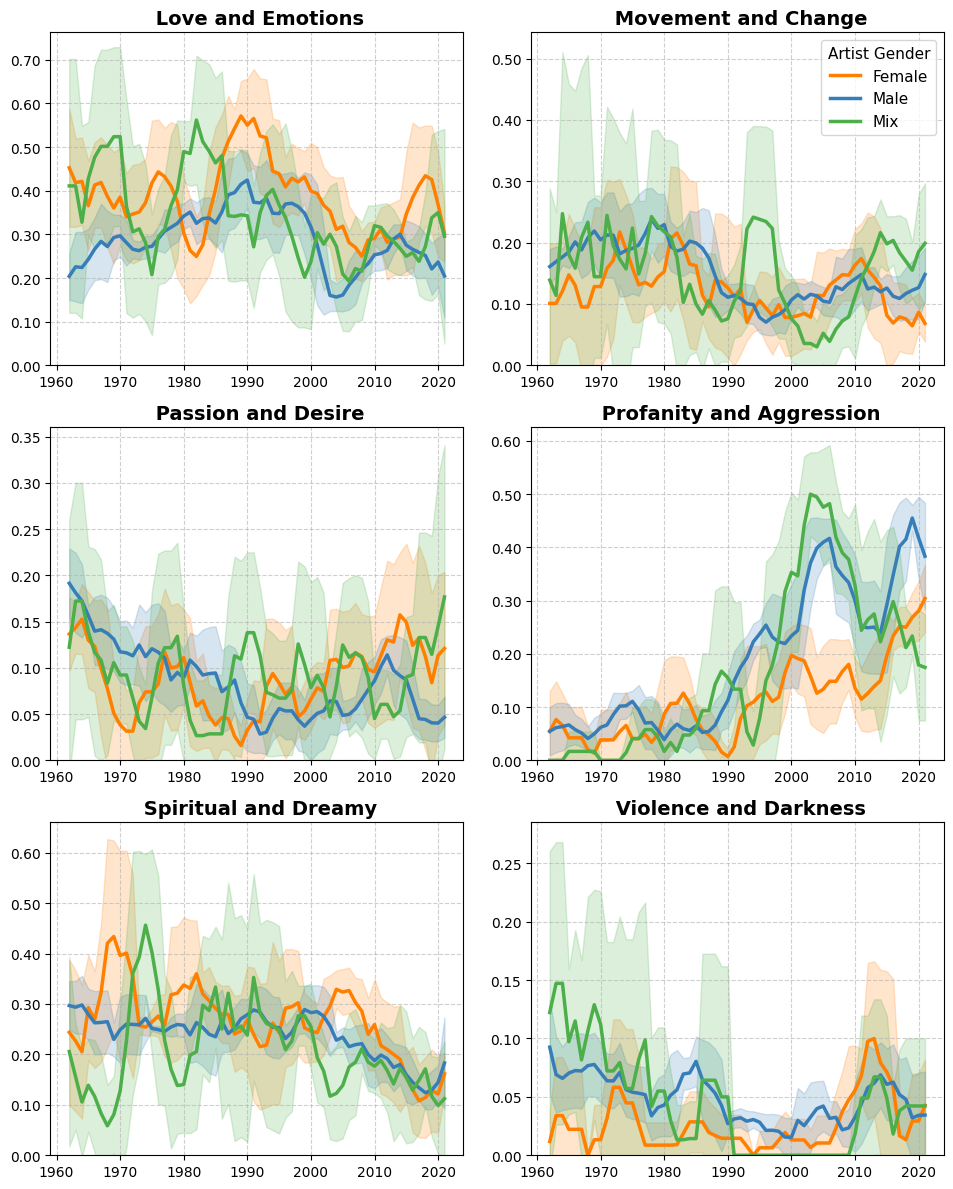

In [ ]:
def plot_trend_with_ci_inline(data, x, y, hue, title, xlabel, ylabel, ci_window=5, custom_palette=None, show_legend=False):
    # Create a rolling mean and confidence interval
    data = data.copy()
    data["mean"] = data.groupby(hue)[y].transform(lambda x: x.rolling(ci_window, center=True).mean())
    data["ci"] = data.groupby(hue)[y].transform(lambda x: x.rolling(ci_window, center=True).std())

    # Plot using seaborn with a custom palette
    sns.lineplot(data=data, x=x, y="mean", hue=hue, ci=None, linewidth=2.5, palette=custom_palette)
    for group in data[hue].unique():
        group_data = data[data[hue] == group]
        plt.fill_between(
            group_data[x],
            group_data["mean"] - group_data["ci"],
            group_data["mean"] + group_data["ci"],
            alpha=0.2,
            color=custom_palette[group]
        )


    # Enhance the plot appearance
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    # plt.legend(title=legend_title, title_fontsize =13, fontsize=13, loc="upper right")  # Use custom legend title
    if show_legend:
        plt.legend(title="Artist Gender", title_fontsize=11, fontsize=11, loc="best")
    else:
        plt.legend().remove()   # Remove legend for other subplots


# Prepare data: Filter non-binary genders
filtered_data = artist_gender_trends[artist_gender_trends["Artist Gender"].isin(["Male", "Female", "Mix"])]

# Define a custom color palette
gender_palette = {"Male": "#377eb8", "Female": "#ff7f00", "Mix": "#4daf4a"}

# List of song topics to iterate over
song_topics = ['Love and Emotions', 'Movement and Change',
       'Passion and Desire', 'Profanity and Aggression',
       'Spiritual and Dreamy', 'Violence and Darkness']

# Plot in a grid (2 graphs per row, 5 rows in total)
rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, song_topic in enumerate(song_topics):
    row = i // cols
    col = i % cols
    plt.sca(axes[row, col])  # Set current axis
    # Show legend only for "Love and Emotions"
    show_legend = song_topic in ['Movement and Change']

    plot_trend_with_ci_inline(
        data=filtered_data,
        x="Year",
        y=song_topic,
        hue="Artist Gender",
        title=f" {song_topic}",
        xlabel="",
        ylabel="",  # Suppress y-axis label here
        ci_window=5,
        custom_palette=gender_palette,  # Apply custom colors
        show_legend=show_legend  # Custom legend title
    )
    axes[row, col].set_ylim(bottom=0)
    # Format y-axis to 2 decimal places
    axes[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # Adjust spacing between rows to be tighter and columns
    plt.subplots_adjust(wspace=7)

    # plt.ylim(0, )  # Set y-axis range
# Adjust layout and display
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/My_PhD_Research/WASABI-Billboard-Analysis/Billboard_Graphs/Overall_song_themes_trends_Billboard_v2.pdf", dpi=300)
plt.show()


## **Generalized Additive Models (GAMs) for Analysig Trends of Moral Expressions in BillboardLyrics**

In [ ]:
# Convert Year to datetime
billboard_data['Year'] = pd.to_datetime(billboard_data['Year'], format='%Y')

# List of moral values
moral_values = ["care", "harm", "fairness", "cheating", "loyalty", "betrayal", "authority", "subversion", "purity", "degradation"]

# Overall time series for all moral values
overall_trends = billboard_data.groupby('Year')[moral_values].mean()

# Time series for each moral value grouped by artist_gender
artist_gender_trends = billboard_data.groupby(['Year', 'Artist Gender'])[moral_values].mean().reset_index()


In [ ]:
billboard_data.shape

In [ ]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
from pygam import LinearGAM, s, f, te

artist_gender_trends['year'] = pd.to_datetime(
    artist_gender_trends['Year']
).dt.year
artist_gender_trends['gender_code'] = (
    artist_gender_trends['Artist Gender'].astype('category').cat.codes
)

moral_values = [
    "care", "harm", "fairness", "cheating", "loyalty", "betrayal",
    "authority", "subversion", "purity", "degradation"
]
BONFERRONI_ALPHA = 0.05 / len(moral_values)  # 0.005

# Helper Functions
def format_p_value(p_value):
    """Format p-value with scientific notation for small values."""
    if p_value < 0.0001:
        return f"{p_value:.2e}"
    elif p_value < 0.001:
        return f"{p_value:.4f}"
    else:
        return f"{p_value:.3f}"

def calculate_trend(gam_model, year_values):
    """Calculate trend direction and magnitude."""
    start_pred = gam_model.predict(np.min(year_values)).item()
    end_pred = gam_model.predict(np.max(year_values)).item()

    direction = "Increase" if end_pred > start_pred else "Decline"
    percent_change = ((end_pred - start_pred) / abs(start_pred)) * 100

    return direction, percent_change

# Run GAMs for Each Moral Foundation
results = []

for moral_value in moral_values:
    # Prepare data
    X = artist_gender_trends[['year', 'gender_code']].values
    y = artist_gender_trends[moral_value].values

    # Model 1: Main effect of year
    gam_main = LinearGAM(s(0)).fit(X[:, 0], y)
    p_value_year = gam_main.statistics_['p_values'][0]

    # Model 2: Interaction model
    gam_interaction = LinearGAM(f(1) + s(0) + te(0, 1)).fit(X, y)
    p_value_interaction = gam_interaction.statistics_['p_values'][2]
    deviance_explained = gam_interaction.statistics_['pseudo_r2']['explained_deviance']

    # Calculate trend
    trend_direction, percent_change = calculate_trend(gam_main, X[:, 0])

    # Store results
    results.append({
        "Moral Foundation": moral_value.title(),
        "Deviance Explained (%)": round(deviance_explained * 100, 2),
        "Magnitude (% Change)": round(percent_change, 2),
        "Trend Direction": trend_direction,
        "P-value (Year)": format_p_value(p_value_year),
        "P-value (Gender × Year)": format_p_value(p_value_interaction),
        "Sig (Year)": "***" if p_value_year < 0.001 else "**" if p_value_year < 0.01 else "*" if p_value_year < 0.05 else "ns",
        "Sig (Interaction)": "***" if p_value_interaction < 0.001 else "**" if p_value_interaction < 0.01 else "*" if p_value_interaction < 0.05 else "ns",
    })

# Create and Format Results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Deviance Explained (%)", ascending=False)

print("=" * 130)
print("GAM ANALYSIS: MORAL FOUNDATIONS OVER TIME")
print("=" * 130)
print(results_df.to_string(index=False))
print("=" * 130)
print(f"\nSignificance codes: *** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant")
print(f"Bonferroni-corrected threshold: α = {BONFERRONI_ALPHA:.4f}")

GAM ANALYSIS: MORAL FOUNDATIONS OVER TIME
Moral Foundation  Deviance Explained (%)  Magnitude (% Change) Trend Direction P-value (Year) P-value (Gender × Year) Sig (Year) Sig (Interaction)
            Harm                   49.14                 36.34        Increase       4.10e-09                1.11e-16        ***               ***
        Cheating                   46.38                 70.92        Increase       2.11e-14                7.45e-14        ***               ***
      Subversion                   43.63                 50.07        Increase       2.85e-09                7.17e-14        ***               ***
            Care                   42.89                -30.40         Decline       6.79e-09                2.31e-13        ***               ***
       Authority                   38.84                 16.08        Increase          0.093                5.11e-09         ns               ***
     Degradation                   33.56                 62.14        Increa